In [1]:
import json

n_qubits = 4

# ====== Load data ======
data = []
with open(f"..\\results\\all_circuit_stats_{n_qubits}.json", "r") as f:
    data = json.load(f)

C:\Users\valte\AppData\Local\Temp\ipykernel_30672\1122071311.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(ansatze_to_plot))


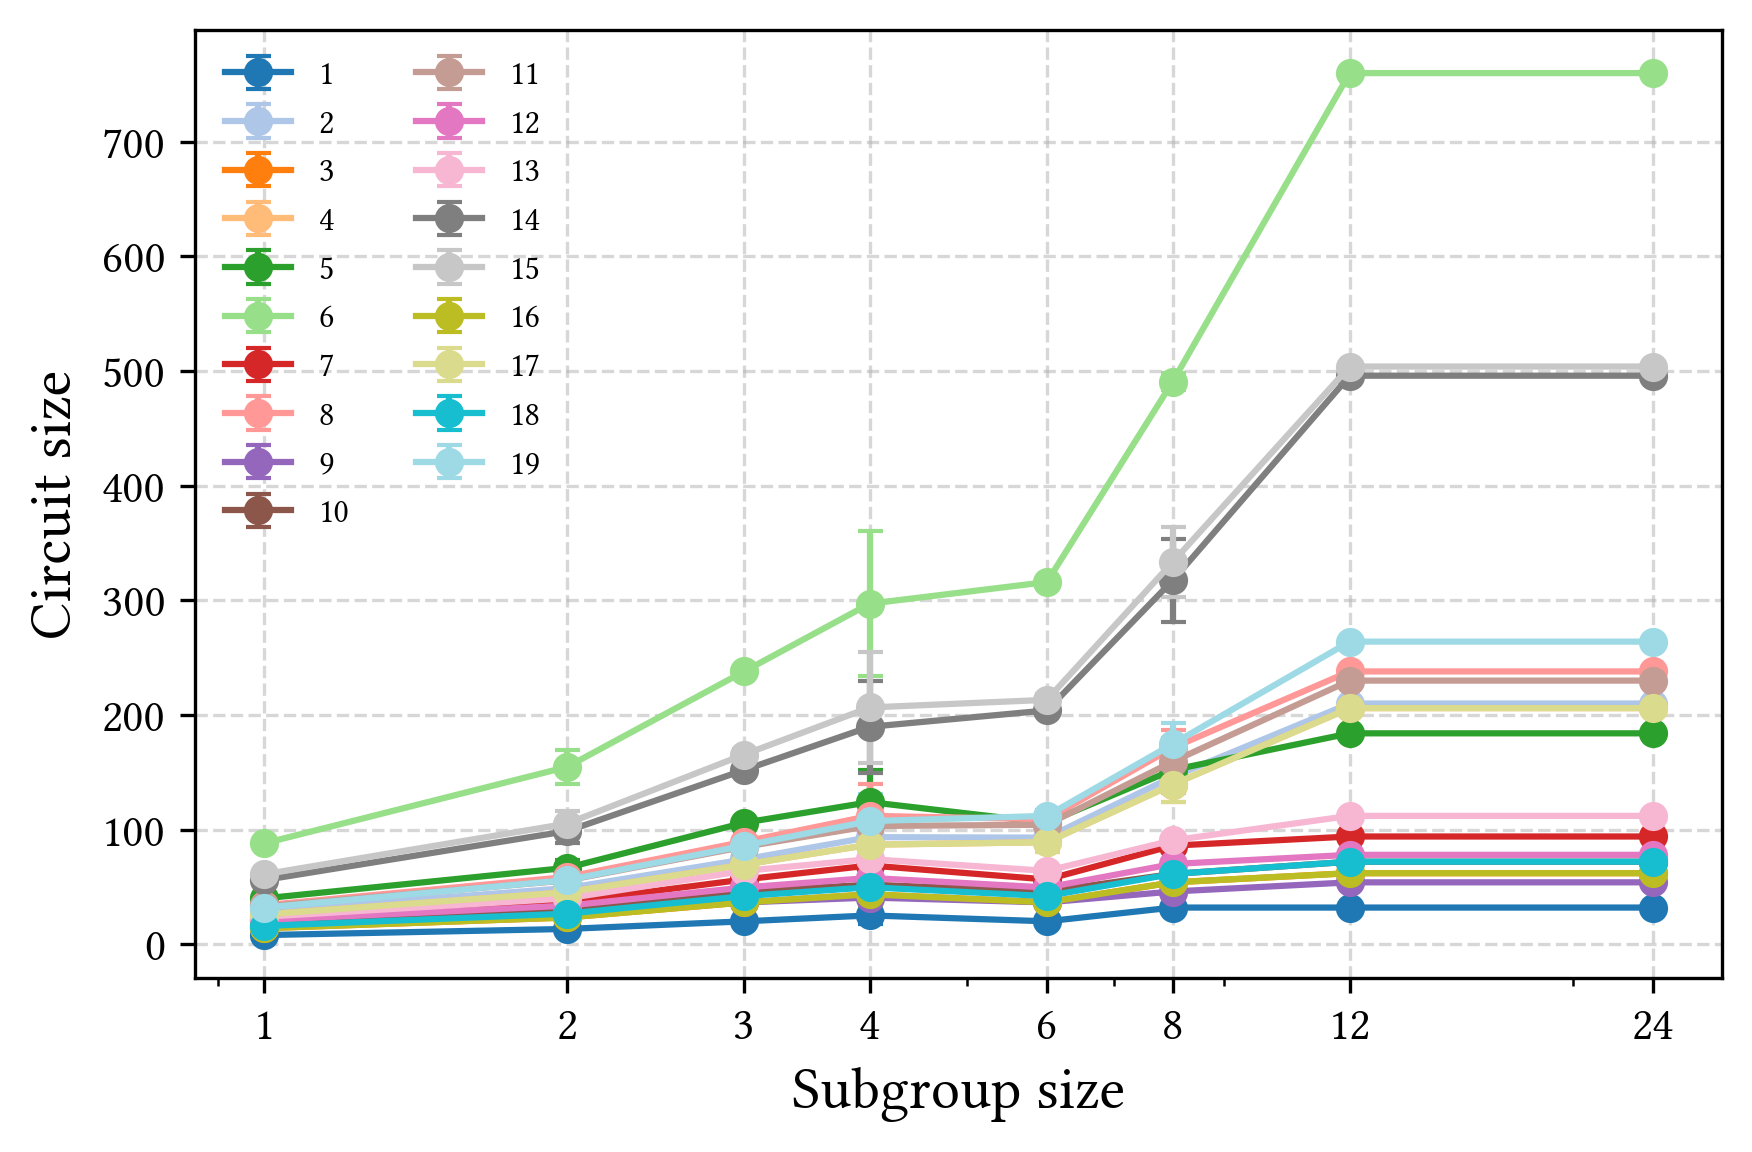

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# ====== Font configuration ======
# Your font configuration remains the same...
font_path = "C:\\Users\\valte\\OneDrive - University of Helsinki\\Desktop\\linux_libertine\\LinLibertine_R.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams.update({
    "font.family": "Linux Libertine",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "figure.dpi": 300,
})

# ====== Parameters ======
layer_to_plot = 1

# ====== Extract data ======
# This part of your code is correct and remains the same
# ... (assuming 'data' is loaded somewhere above)
records = []
layer_data = data[str(n_qubits)][str(layer_to_plot)]

for ans, ans_data in layer_data.items():
    orig = ans_data["original_stats"]
    for subgroup, twirls in ans_data["twirled_stats"].items():
        depths = [t["size"] for t in twirls]
        records.append({
            "ansatz": int(ans),
            "subgroup": int(subgroup),
            "depth_mean": np.mean(depths),
            "depth_std": np.std(depths),
            "original_depth": orig["size"]
        })

df = pd.DataFrame(records)


# ====== Plot (Depth vs Subgroup Size) ======
plt.figure(figsize=(6,4))

# --- NEW CODE GOES HERE ---
# 1. Get the list of ansatzes you will plot
ansatze_to_plot = sorted(df["ansatz"].unique())[:20]
# 2. Get a colormap. 'viridis' is a good choice, 'tab20' is designed for 20 distinct colors.
cmap = plt.cm.get_cmap('tab20', len(ansatze_to_plot))
# 3. Create a list of colors from the colormap
colors = cmap.colors
# 4. Set the color cycle for the current axes
plt.gca().set_prop_cycle(plt.cycler(color=colors))
# --- END OF NEW CODE ---

# Your plotting loop now uses the new color cycle automatically
for ans in ansatze_to_plot:
    subset = df[df["ansatz"] == ans].sort_values("subgroup")
    plt.errorbar(subset["subgroup"], subset["depth_mean"],
                 yerr=subset["depth_std"], fmt='o-', capsize=3, label=f"Ansatz {ans}")

plt.xlabel("Subgroup size")
plt.ylabel("Circuit size")
plt.xscale("log")
subgroup_values = sorted(df["subgroup"].unique())
plt.xticks(subgroup_values, labels=[str(x) for x in subgroup_values], rotation=0)
#plt.title(f"Effect of Symmetrization on Circuit Depth (Layer {layer_to_plot})")
plt.grid(True, linestyle="--", alpha=0.5)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles,
    [f"{int(l.split()[-1])}" for l in labels],
    loc="upper left",
    fontsize=8,
    frameon=False,
    ncol=2,
    title=None
)

plt.tight_layout()
plt.show()

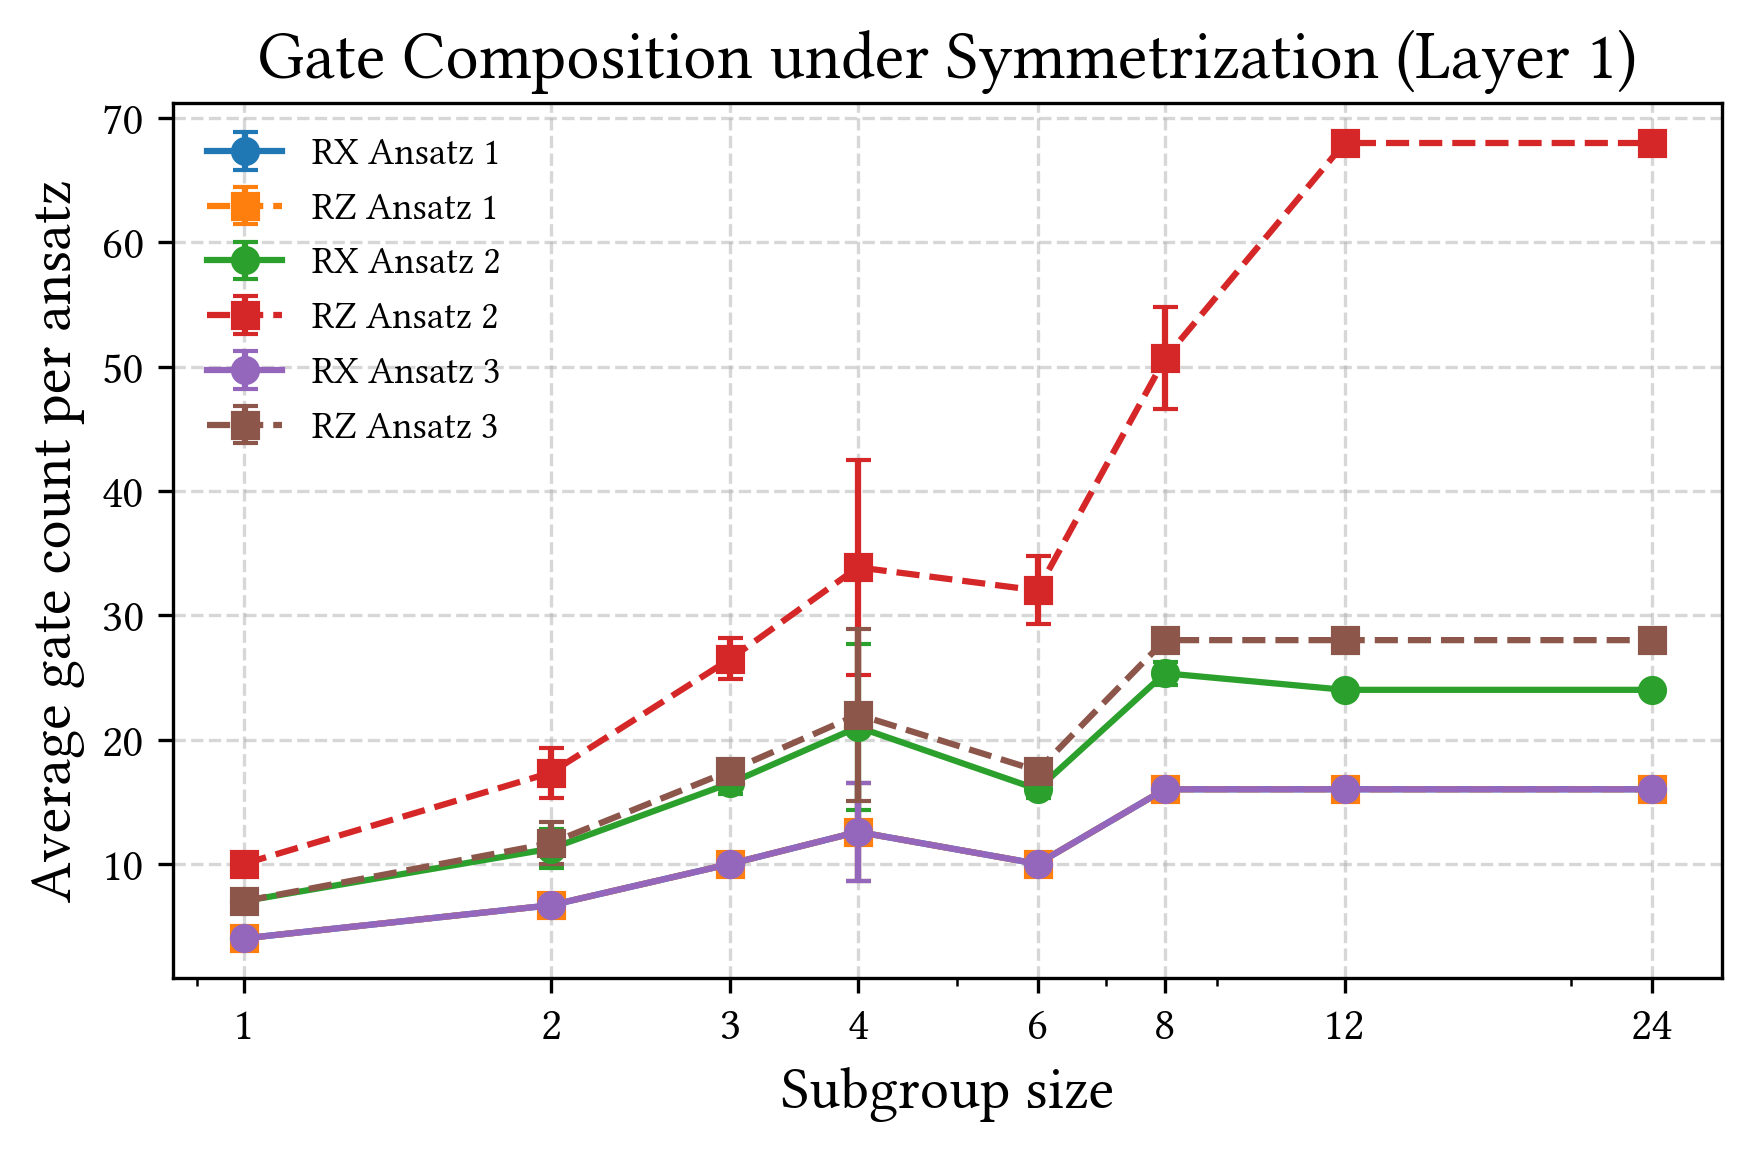

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# ====== Font configuration ======
font_path = "C:\\Users\\valte\\OneDrive - University of Helsinki\\Desktop\\linux_libertine\\LinLibertine_R.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams.update({
    "font.family": "Linux Libertine",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "figure.dpi": 300,
})

# ====== Parameters ======
layer_to_plot = 1  # focus on a single layer

# ====== Extract gate counts ======
records = []
layer_data = data[str(n_qubits)][str(layer_to_plot)]

for ans, ans_data in layer_data.items():
    for subgroup, twirls in ans_data["twirled_stats"].items():
        rx_counts = [t["gate_counts"].get("rx", 0) for t in twirls]
        rz_counts = [t["gate_counts"].get("rz", 0) for t in twirls]
        rrz_counts = [t["gate_counts"].get("rrz", 0) for t in twirls]
        rrx_counts = [t["gate_counts"].get("rrx", 0) for t in twirls]
        records.append({
            "ansatz": int(ans),
            "subgroup": int(subgroup),
            "rx_mean": np.mean(rx_counts),
            "rx_std": np.std(rx_counts),
            "rz_mean": np.mean(rz_counts),
            "rz_std": np.std(rz_counts),
            "rrz_mean": np.mean(rrz_counts),
            "rrz_std": np.std(rrz_counts),
            "rrx_mean": np.mean(rrx_counts),
            "rrx_std": np.std(rrx_counts),
        })

df = pd.DataFrame(records)

# ====== Plot ======
plt.figure(figsize=(6,4))
for ans in sorted(df["ansatz"].unique())[:3]:  # first few ansatzes
    subset = df[df["ansatz"] == ans].sort_values("subgroup")
    # Plot if mean is non-zero
    if subset["rx_mean"].max() != 0:
        plt.errorbar(subset["subgroup"], subset["rx_mean"], yerr=subset["rx_std"], fmt='o-', capsize=3, label=f"RX Ansatz {ans}")
    if subset["rz_mean"].max() != 0:
        plt.errorbar(subset["subgroup"], subset["rz_mean"], yerr=subset["rz_std"], fmt='s--', capsize=3, label=f"RZ Ansatz {ans}")
    if subset["rrz_mean"].max() != 0:
        plt.errorbar(subset["subgroup"], subset["rrz_mean"], yerr=subset["rrz_std"], fmt='^-.', capsize=3, label=f"RRZ Ansatz {ans}")
    if subset["rrx_mean"].max() != 0:
        plt.errorbar(subset["subgroup"], subset["rrx_mean"], yerr=subset["rrx_std"], fmt='v:', capsize=3, label=f"RRX Ansatz {ans}")

plt.xlabel("Subgroup size")
plt.ylabel("Average gate count per ansatz")
# Put subgroup sizes to x-ticks
plt.xscale("log")
subgroup_values = sorted(df["subgroup"].unique())
plt.xticks(subgroup_values, labels=[str(x) for x in subgroup_values], rotation=0)
plt.title(f"Gate Composition under Symmetrization (Layer {layer_to_plot})")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(frameon=False, fontsize=9)
plt.tight_layout()
plt.show()


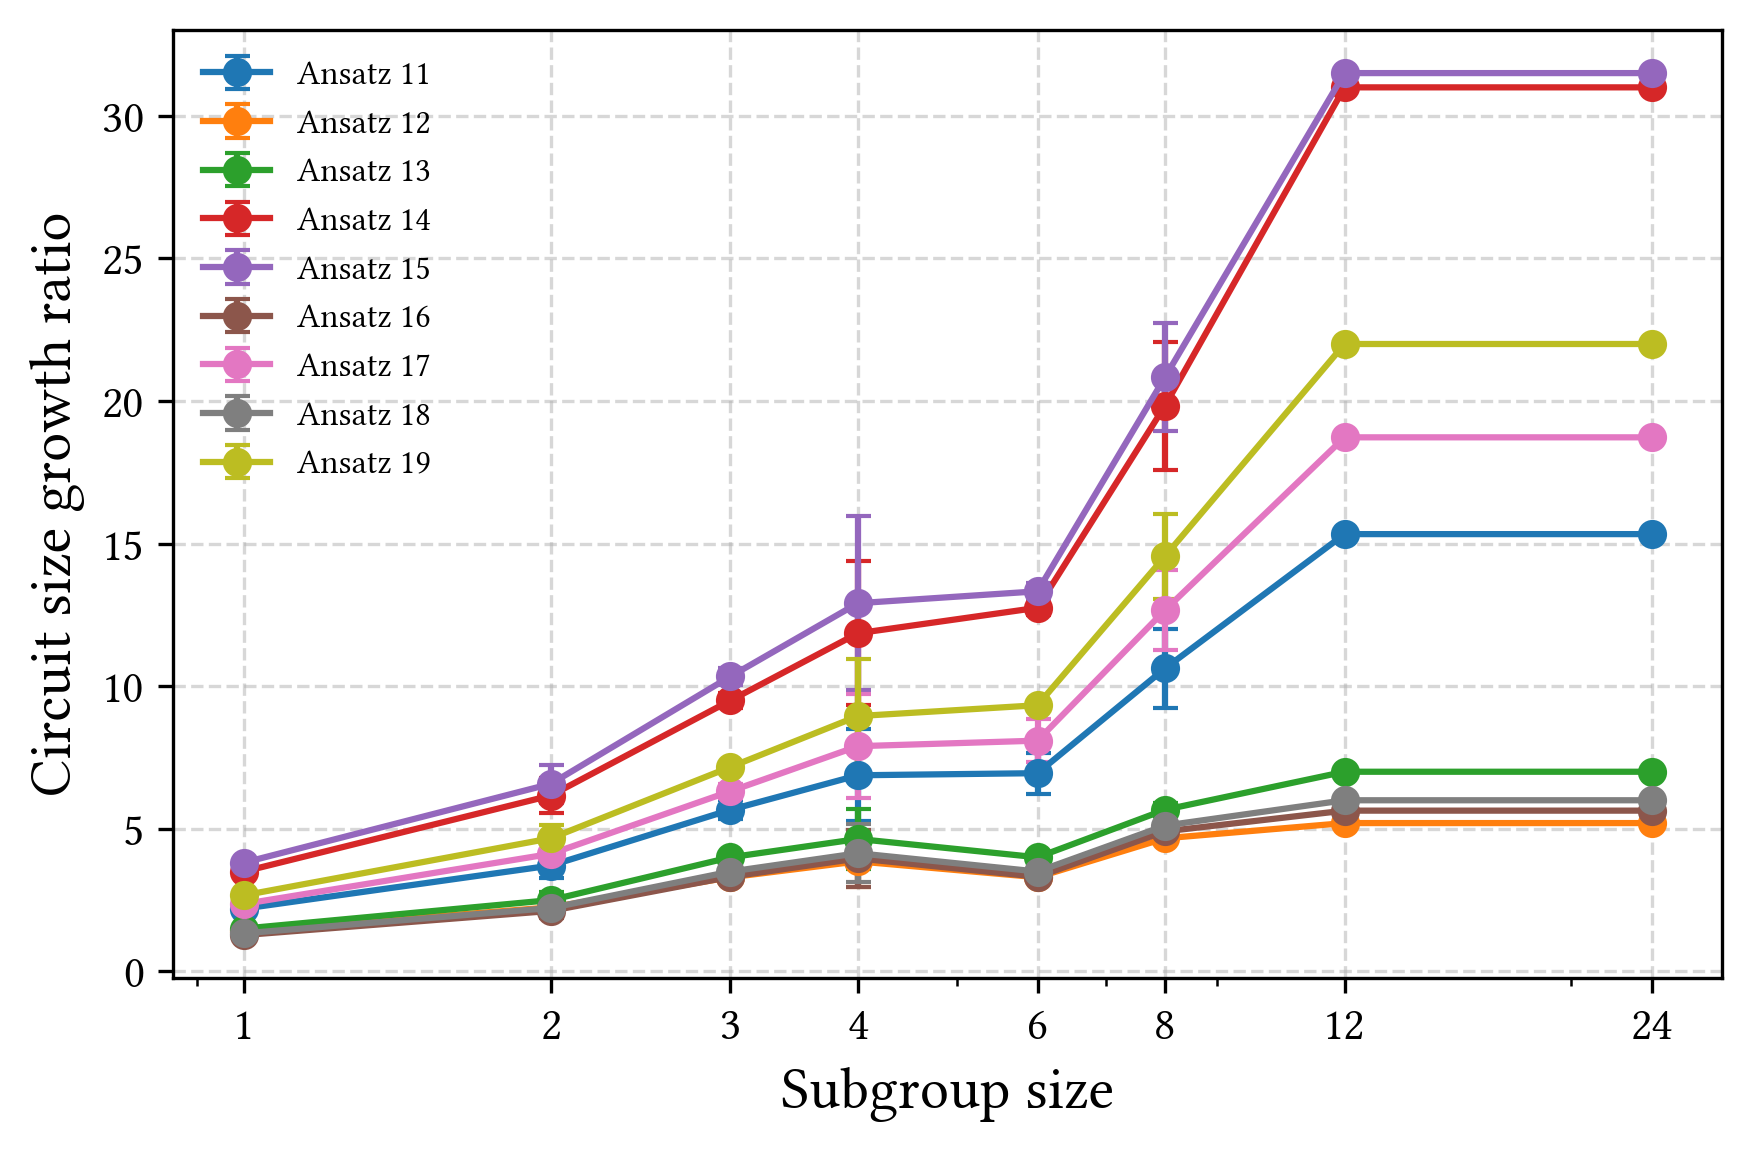

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# ====== Font configuration ======
font_path = "C:\\Users\\valte\\OneDrive - University of Helsinki\\Desktop\\linux_libertine\\LinLibertine_R.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams.update({
    "font.family": "Linux Libertine",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "figure.dpi": 300,
})

# ====== Parameters ======
layer_to_plot = 1  # focus on a single layer

# ====== Extract size growth ======
records = []
layer_data = data[str(n_qubits)][str(layer_to_plot)]

for ans, ans_data in layer_data.items():
    orig_size = ans_data["original_stats"]["size"]
    for subgroup, twirls in ans_data["twirled_stats"].items():
        twirled_sizes = [t["size"] for t in twirls]
        records.append({
            "ansatz": int(ans),
            "subgroup": int(subgroup),
            "size_growth_mean": np.mean(np.array(twirled_sizes) / orig_size),
            "size_growth_std": np.std(np.array(twirled_sizes) / orig_size)
        })

df = pd.DataFrame(records)

# ====== Plot ======
plt.figure(figsize=(6,4))
for ans in sorted(df["ansatz"].unique())[10:20]:  # first few ansatzes
    subset = df[df["ansatz"] == ans].sort_values("subgroup")
    plt.errorbar(subset["subgroup"], subset["size_growth_mean"],
                 yerr=subset["size_growth_std"], fmt='o-', capsize=3, label=f"Ansatz {ans}")

plt.xlabel("Subgroup size")
plt.ylabel("Circuit size growth ratio")
# Put subgroup sizes to x-ticks
plt.xscale("log")
subgroup_values = sorted(df["subgroup"].unique())
plt.xticks(subgroup_values, labels=[str(x) for x in subgroup_values], rotation=0)
#plt.title(f"Growth in Circuit Size due to Twirling (Layer {layer_to_plot})")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(frameon=False, fontsize=8)
plt.tight_layout()
plt.show()


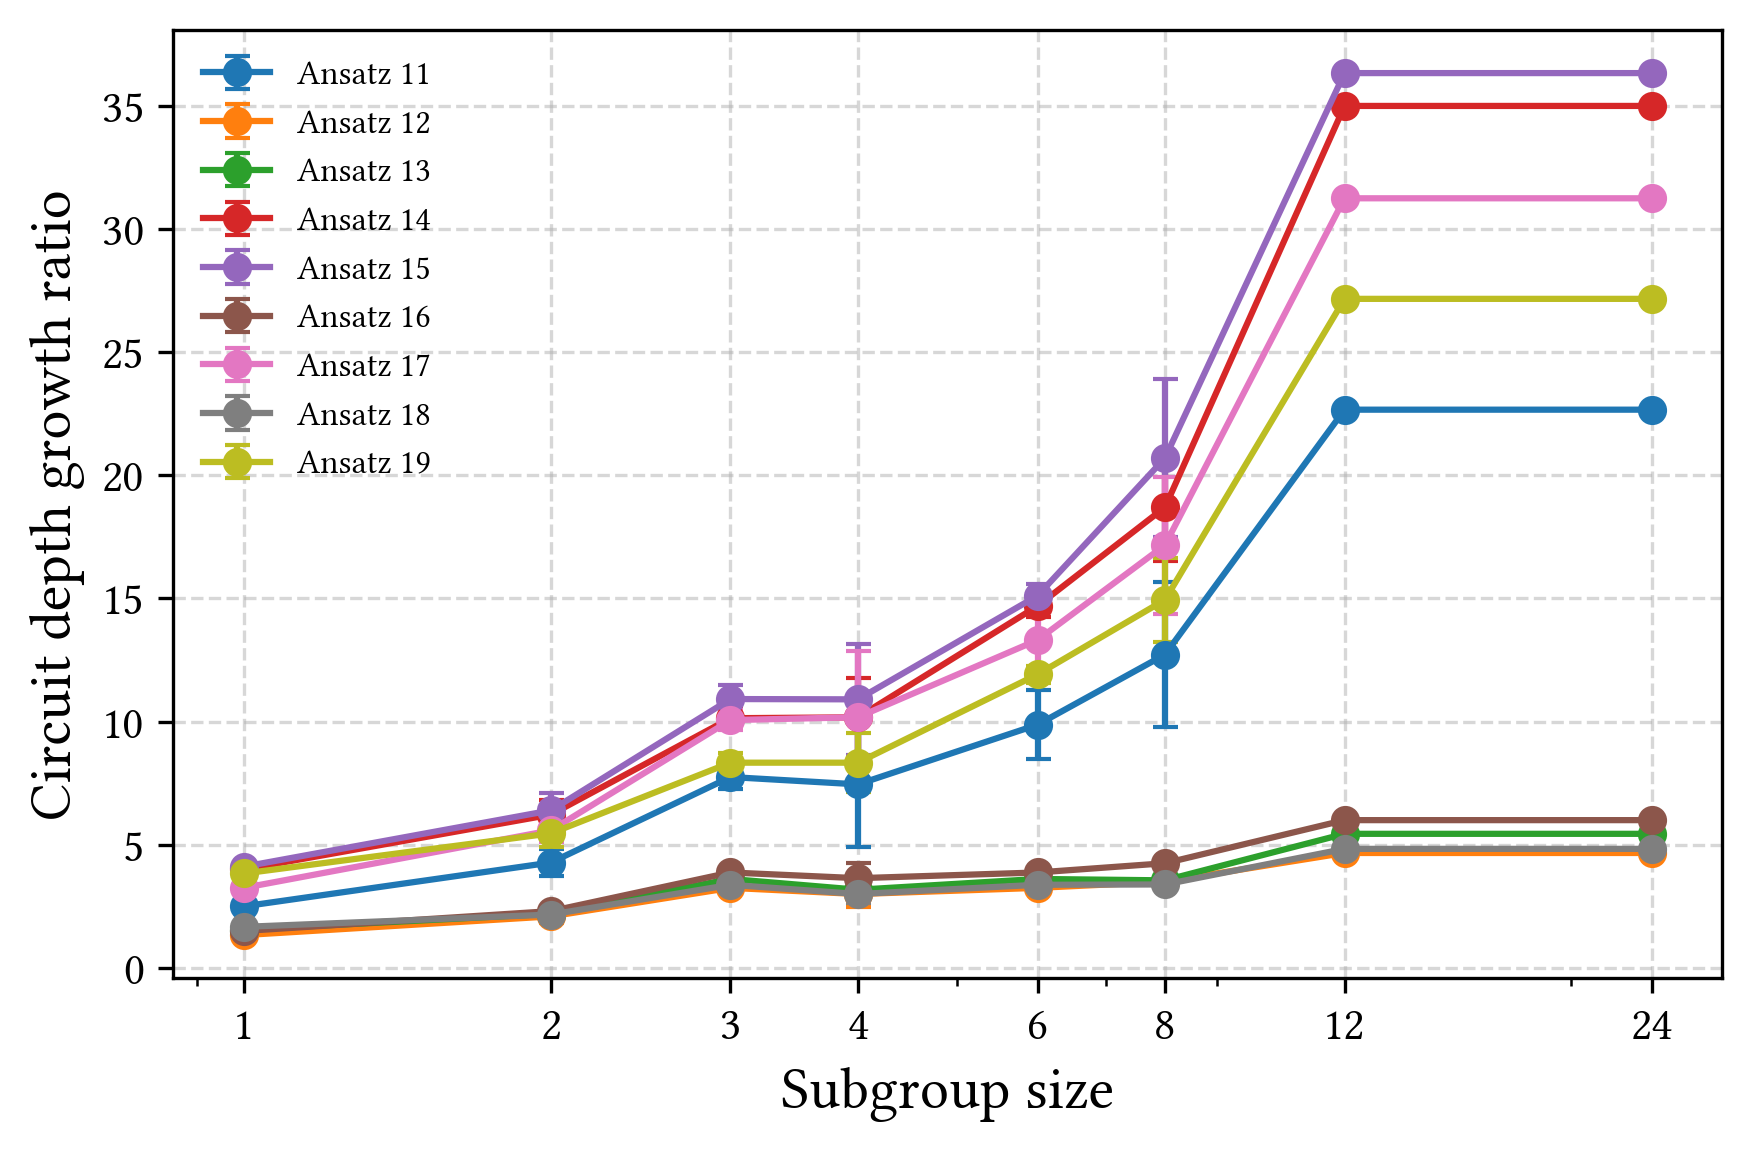

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# ====== Font configuration ======
font_path = "C:\\Users\\valte\\OneDrive - University of Helsinki\\Desktop\\linux_libertine\\LinLibertine_R.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams.update({
    "font.family": "Linux Libertine",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "figure.dpi": 300,
})

# ====== Parameters ======
layer_to_plot = 1  # focus on a single layer

# ====== Extract size growth ======
records = []
layer_data = data[str(n_qubits)][str(layer_to_plot)]

for ans, ans_data in layer_data.items():
    orig_size = ans_data["original_stats"]["depth"]
    for subgroup, twirls in ans_data["twirled_stats"].items():
        twirled_sizes = [t["depth"] for t in twirls]
        records.append({
            "ansatz": int(ans),
            "subgroup": int(subgroup),
            "depth_growth_mean": np.mean(np.array(twirled_sizes) / orig_size),
            "depth_growth_std": np.std(np.array(twirled_sizes) / orig_size)
        })

df = pd.DataFrame(records)

# ====== Plot ======
plt.figure(figsize=(6,4))
for ans in sorted(df["ansatz"].unique())[10:20]:  # first few ansatzes
    subset = df[df["ansatz"] == ans].sort_values("subgroup")
    plt.errorbar(subset["subgroup"], subset["depth_growth_mean"],
                 yerr=subset["depth_growth_std"], fmt='o-', capsize=3, label=f"Ansatz {ans}")

plt.xlabel("Subgroup size")
plt.ylabel("Circuit depth growth ratio")
# Put subgroup sizes to x-ticks
plt.xscale("log")
subgroup_values = sorted(df["subgroup"].unique())
plt.xticks(subgroup_values, labels=[str(x) for x in subgroup_values], rotation=0)
#plt.title(f"Growth in Circuit Size due to Twirling (Layer {layer_to_plot})")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(frameon=False, fontsize=8)
plt.tight_layout()
plt.show()